In [6]:
import pandas as pd

df = pd.read_csv('Apple Stock Prices (1981 to 2023).csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10608 non-null  object 
 1   Open       10608 non-null  float64
 2   High       10608 non-null  float64
 3   Low        10608 non-null  float64
 4   Close      10608 non-null  float64
 5   Adj Close  10608 non-null  float64
 6   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 580.3+ KB


In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02/01/1981,0.154018,0.155134,0.154018,0.154018,0.119849,21660800
1,05/01/1981,0.151228,0.151228,0.150670,0.150670,0.117244,35728000
2,06/01/1981,0.144531,0.144531,0.143973,0.143973,0.112032,45158400
3,07/01/1981,0.138393,0.138393,0.137835,0.137835,0.107256,55686400
4,08/01/1981,0.135603,0.135603,0.135045,0.135045,0.105085,39827200


                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1981-01-02  0.154018  0.155134  0.154018  0.154018   0.119849  21660800
1981-01-03  0.154018  0.155134  0.154018  0.154018   0.119849  21660800
1981-01-04  0.154018  0.155134  0.154018  0.154018   0.119849  21660800
1981-01-05  0.151228  0.151228  0.150670  0.150670   0.117244  35728000
1981-01-06  0.144531  0.144531  0.143973  0.143973   0.112032  45158400


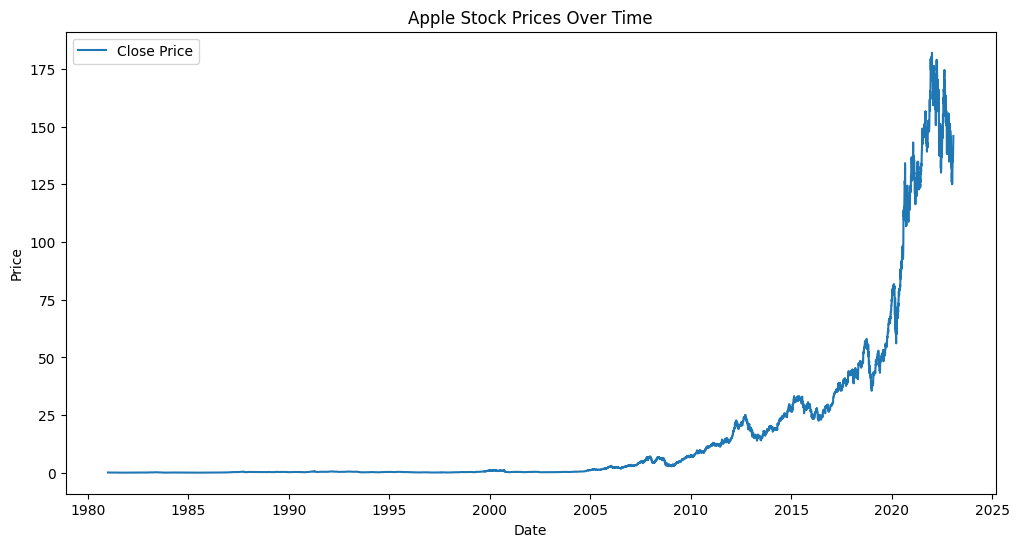

In [8]:
# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Set the 'Date' column as the index
df = df.set_index('Date')

# Resample the data to a daily frequency, filling missing values with the previous day's data
df_daily = df.resample('D').ffill()
print(df_daily.head())
# Plot the data
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Prices Over Time')
plt.legend()
plt.show()



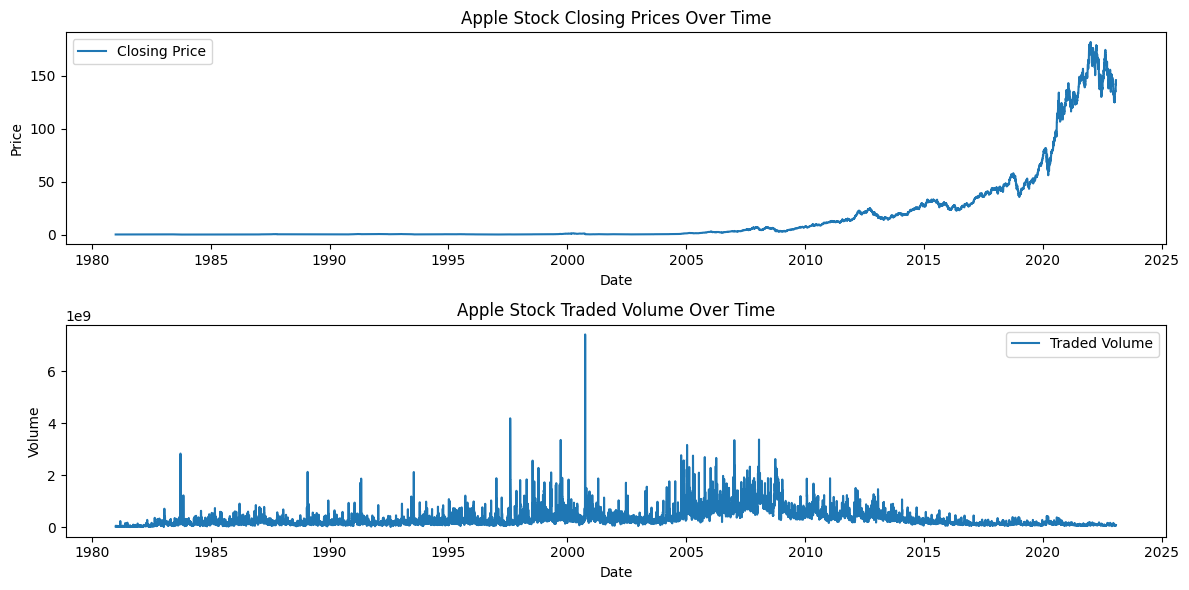

In [9]:
# Plotting closing prices and traded volume
plt.figure(figsize=(12, 6))

# Plot closing prices

plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
plt.plot(df_daily.index, df_daily['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Closing Prices Over Time')
plt.legend()

# Plot traded volume
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
plt.plot(df_daily.index, df_daily['Volume'], label='Traded Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Apple Stock Traded Volume Over Time')
plt.legend()

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()


In [11]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


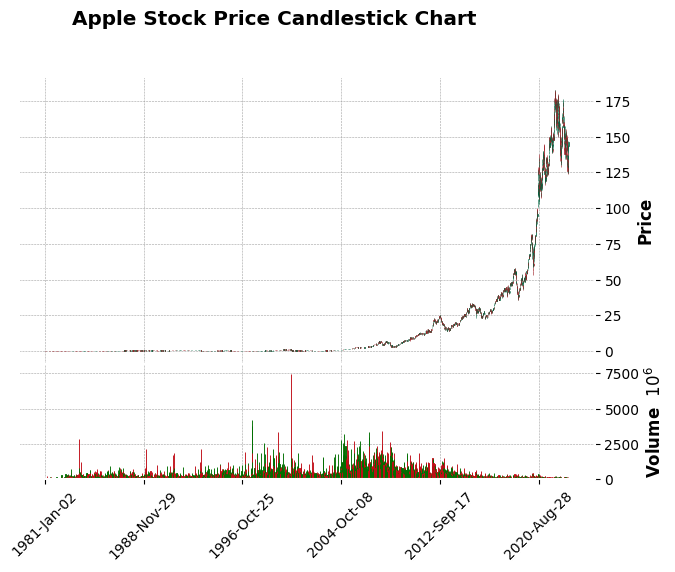

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf


mpf.plot(df, type='candle', style='charles', volume=True, title='Apple Stock Price Candlestick Chart')


In [13]:
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure(data=[go.Candlestick(x=df_daily.index,
                open=df_daily['Open'],
                high=df_daily['High'],
                low=df_daily['Low'],
                close=df_daily['Close'])])

fig.show()

In [14]:
from scipy import stats
import numpy as np
summary_stats = df_daily[['Open', 'High', 'Low', 'Close', 'Volume']].describe()
print("Mean :\n")
print(summary_stats.loc['mean'])
print("\nMedian :\n")
print(summary_stats.loc['std'])


Mean :

Open      1.670498e+01
High      1.688976e+01
Low       1.651382e+01
Close     1.670885e+01
Volume    3.228646e+08
Name: mean, dtype: float64

Median :

Open      3.544766e+01
High      3.586769e+01
Low       3.502052e+01
Close     3.546331e+01
Volume    3.374277e+08
Name: std, dtype: float64


In [15]:
#median
median_open = np.median(df_daily['Open'])
print("Open median :" ,median_open)
median_high = np.median(df_daily['High'])
print("High median :" ,median_high)
median_low = np.median(df_daily['Low'])
print("Low median :" ,median_low)
median_close = np.median(df_daily['Close'])
print("Close median :" ,median_close)
median_volume = np.median(df_daily['Volume'])
print("Volume median :" ,median_volume)

Open median : 0.49
High median : 0.497768
Low median : 0.483393
Close median : 0.489955
Volume median : 211702400.0


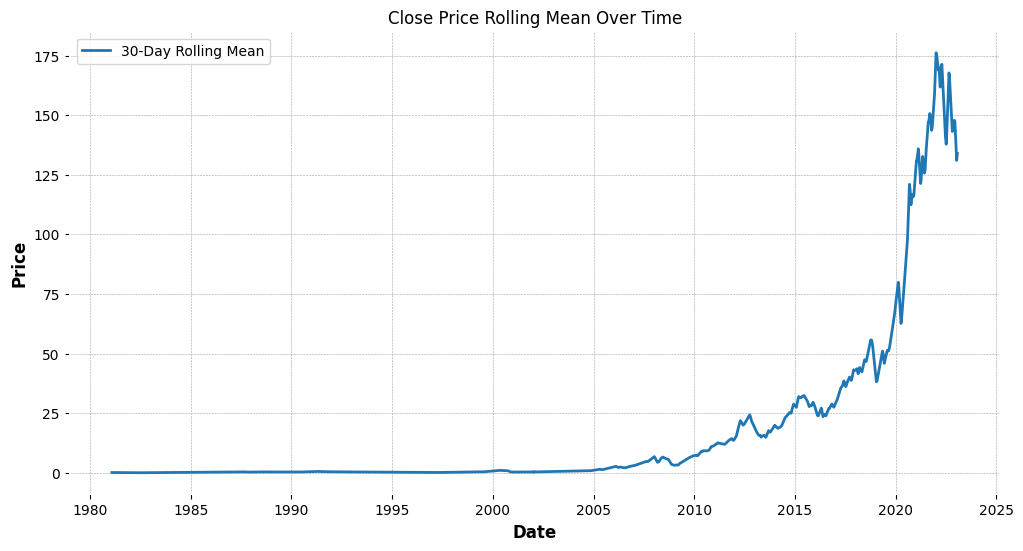

In [16]:
# Calculate a 30-day rolling mean of the 'Close' price
df_daily['Rolling_Mean'] = df_daily['Close'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily['Rolling_Mean'], label='30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price Rolling Mean Over Time')
plt.legend()
plt.show()

In [17]:
from scipy import stats

df_daily['Year'] = df_daily.index.year

yearly_means = df_daily.groupby('Year')['Close'].mean()

year1 = 1981
year2 = 1982

if year1 in yearly_means.index and year2 in yearly_means.index:
    group1 = df_daily[df_daily.index.year == year1]['Close']
    group2 = df_daily[df_daily.index.year == year2]['Close']
    t_statistic, p_value = stats.ttest_ind(group1, group2)

    print(f"T-test results for years {year1} and {year2}:")
    print(f"T-statistic: {t_statistic:.4f}")
    print(f"P-value: {p_value: }")

    alpha = 0.05 # Significance level
    if p_value < alpha:
        print("The difference in means is statistically significant.")
    else:
        print("The difference in means is not statistically significant.")
else:
    print("One or both specified years are not present in the dataset.")


T-test results for years 1981 and 1982:
T-statistic: 12.7680
P-value:  7.8984311996671e-34
The difference in means is statistically significant.


In [18]:
yearly_means

,Close
Year,
1981,0.108763
1982,0.085529
1983,0.167623
1984,0.119450
1985,0.090270
1986,0.144964
1987,0.347266
1988,0.370460
1989,0.371685


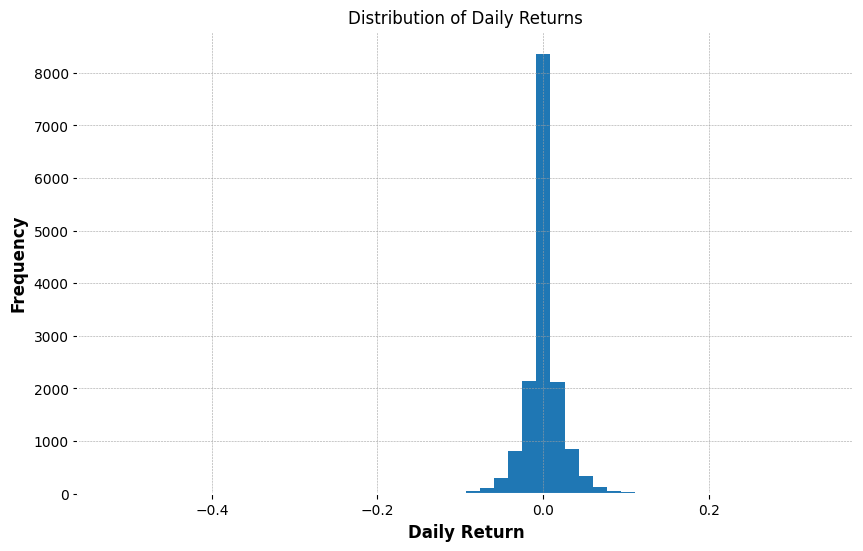

Shapiro-Wilk Test Results: ShapiroResult(statistic=0.8364055713923635, pvalue=6.832620553620485e-82)

The daily returns are not normally distributed (reject null hypothesis)



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15364.



In [20]:
# Calculate daily returns
df_daily['Daily_Return'] = df_daily['Close'].pct_change()

# Drop the first row which will have NaN due to pct_change
df_daily = df_daily.dropna(subset=['Daily_Return'])

# Examine the distribution of daily returns
plt.figure(figsize=(10, 6))
plt.hist(df_daily['Daily_Return'], bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns')
plt.show()

# Test for normality using Shapiro-Wilk test
shapiro_test = stats.shapiro(df_daily['Daily_Return'])
print(f"Shapiro-Wilk Test Results: {shapiro_test}\n")

# Interpret the Shapiro-Wilk test
alpha = 0.05  # significance level
if shapiro_test.pvalue < alpha:
    print("The daily returns are not normally distributed (reject null hypothesis)\n")
else:
    print("The daily returns are normally distributed (fail to reject null hypothesis)\n")

